## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import random

## Helper Function for Feature Information

In [2]:
data_info = pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


## Reading Dataset

In [7]:
df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Exploratory Data Analysis

### Target Variables Distribution

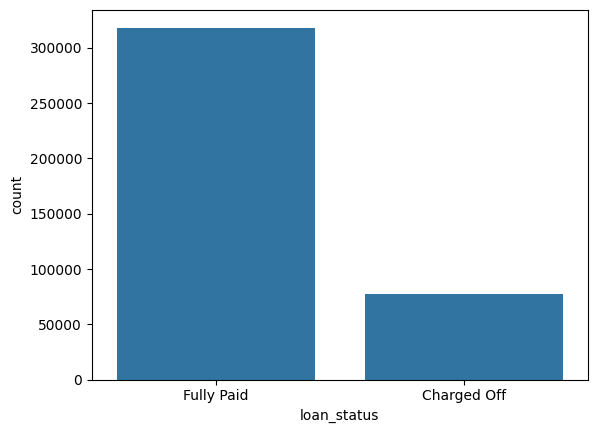

In [9]:
sns.countplot(x='loan_status', data=df);

### Distribution of Loan Amount

<Figure size 1200x800 with 0 Axes>

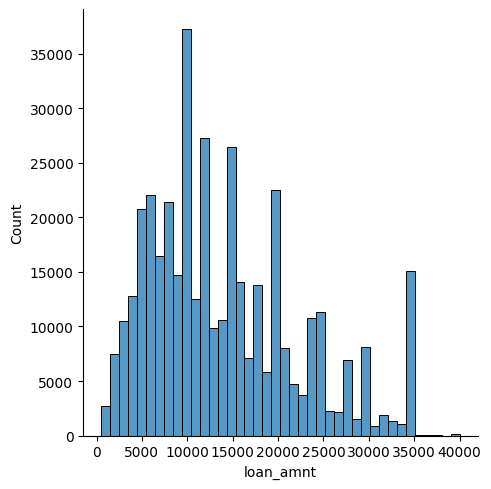

In [10]:
plt.figure(figsize=(12,8))
sns.displot(df['loan_amnt'], bins=40);

### Correlation of Numeric Data

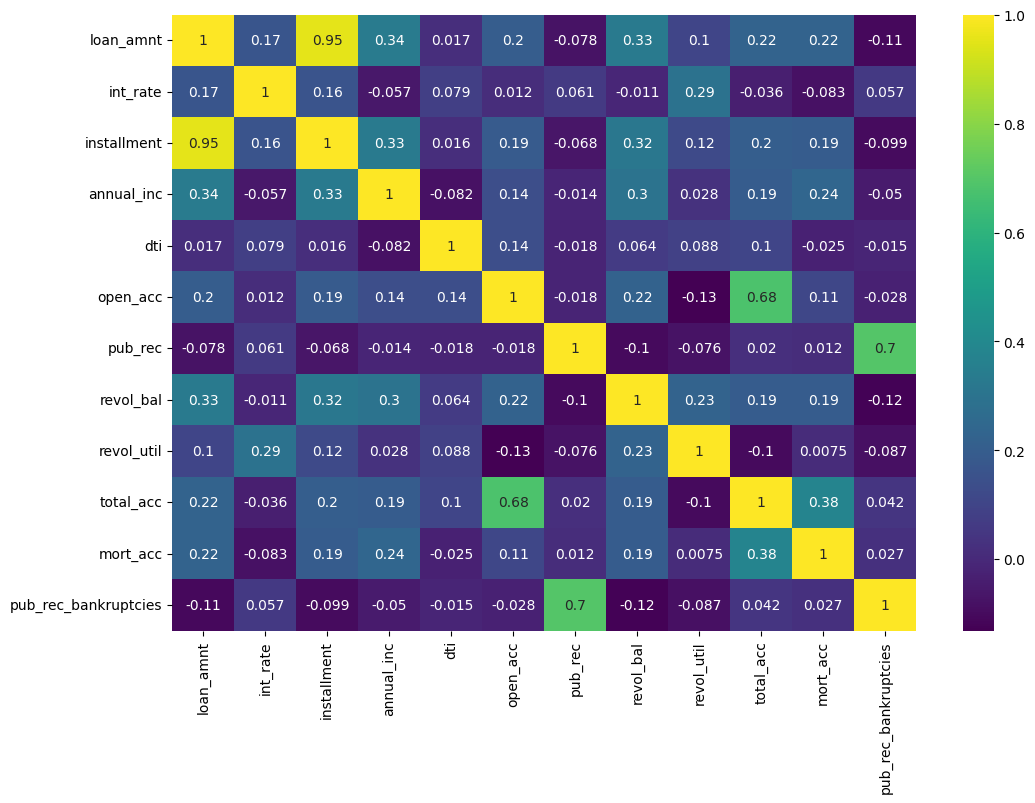

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis');

### Exploring Installment Feature

In [12]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [13]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


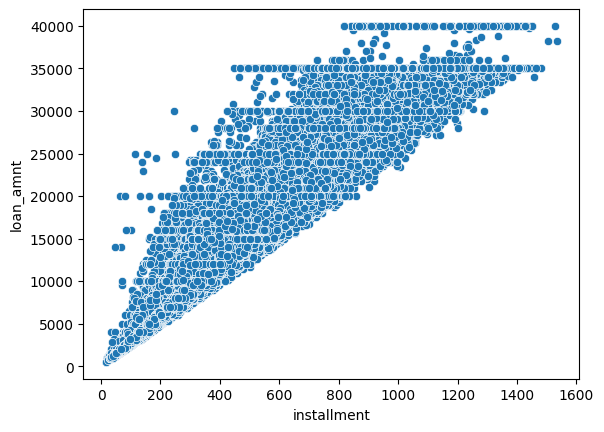

In [14]:
sns.scatterplot(x='installment', y='loan_amnt', data=df);

### Relationship between Loan Status and Loan Amount

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

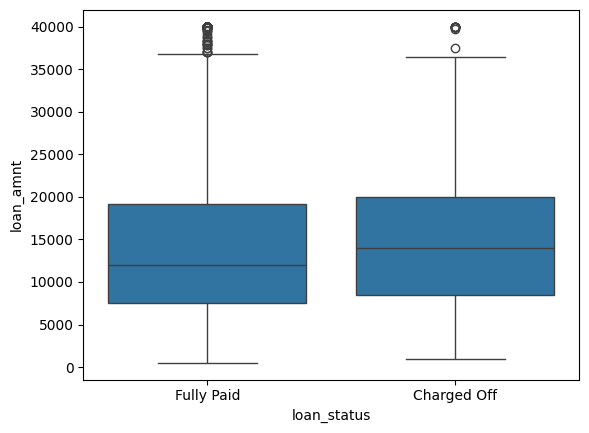

In [15]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

### Summary Statistics of Loan Amount Grouped by Loan Status

In [16]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


### Explore Grade and SubGrade

In [17]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [18]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

### Count Plot per Grade

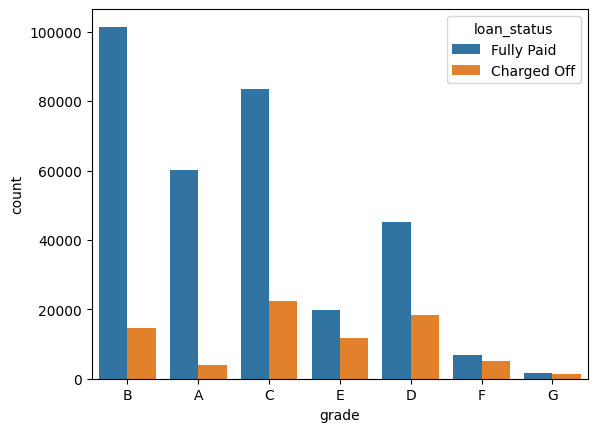

In [19]:
sns.countplot(x='grade', data=df, hue='loan_status');

### Count Plot per Sub Grade

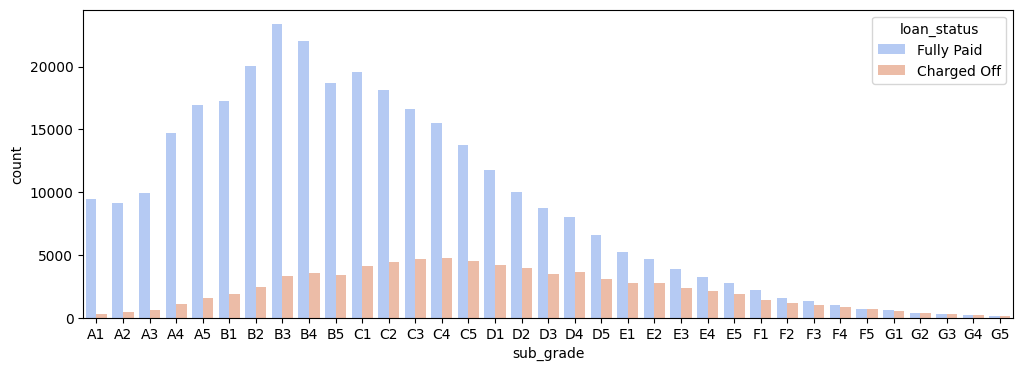

In [20]:
plt.figure(figsize=(12,4))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=sub_grade_order,
              palette='coolwarm', hue='loan_status');

### F and G Sub Grade Count Plot

In [21]:
f_and_g = df[(df['grade'] == 'F') | (df['grade'] == 'G') ]

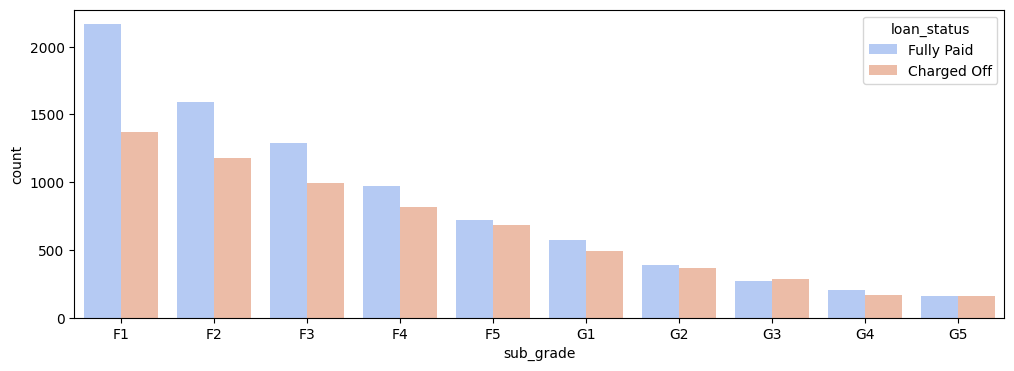

In [22]:
plt.figure(figsize=(12,4))
sub_grade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, order=sub_grade_order,
              palette='coolwarm', hue='loan_status');

### Create a Loan Repaid Column

It will contain 1 if the loan status was "Fully Paid" and 0 if it was "Charged Off"

In [23]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, "Charged Off": 0})

In [24]:
df[['loan_repaid', 'loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


### Checking Correlation

<Axes: >

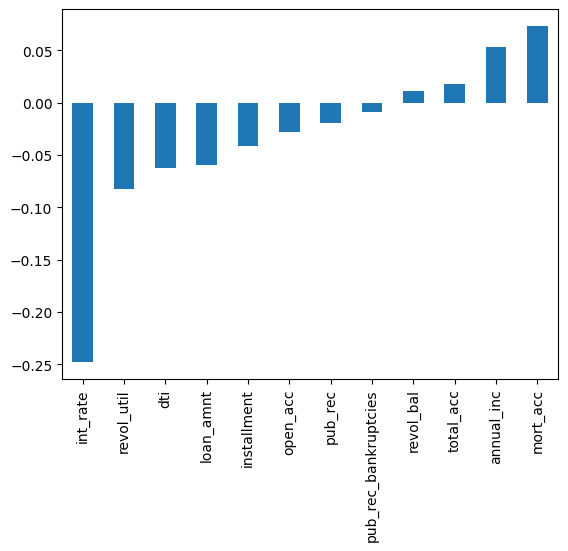

In [25]:
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

## Handling Missing Data

In [26]:
len(df)

396030

In [27]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [28]:
(df.isnull().sum() / len(df)) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

### Checking if it is good to drop emp_title and emp_length feature

In [29]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [30]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [31]:
df['emp_title'].nunique()

173105

In [32]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [33]:
df = df.drop('emp_title', axis=1)

In [34]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [35]:
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years',
                    '5 years', '6 years', '7 years', '8 years', '9 years',
                    '10+ years']

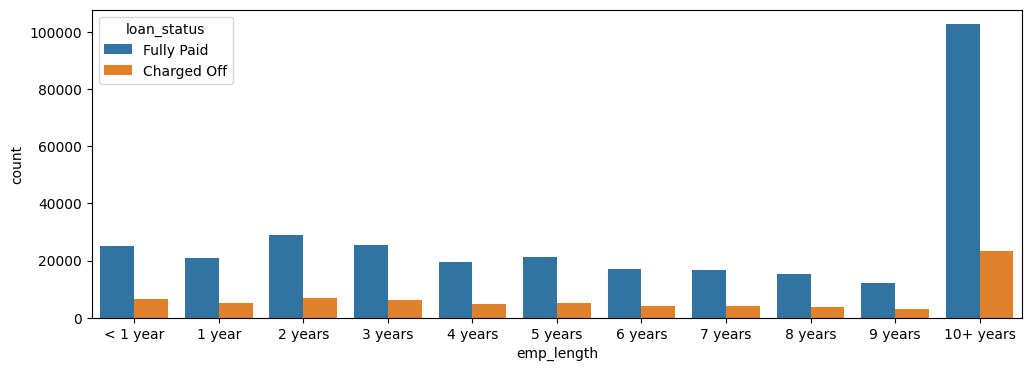

In [36]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=emp_length_order,
              hue='loan_status');

In [37]:
emp_charged_off = df[df['loan_status'] == "Charged Off"].groupby('emp_length').count()['loan_status']
emp_fully_paid = df[df['loan_status'] == "Fully Paid"].groupby('emp_length').count()['loan_status']

In [38]:
emp_charged_off / (emp_charged_off + emp_fully_paid)

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

In [39]:
df = df.drop('emp_length', axis=1)

In [40]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

### Purpose Column vs Title Column

In [41]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [42]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [43]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [44]:
feat_info('title')

The loan title provided by the borrower


In [45]:
df = df.drop('title', axis=1)

In [46]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

### Understanding Mort Account Feature

In [47]:
feat_info('mort_acc')

Number of mortgage accounts.


In [48]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

#### Which Columns are Highly Correlated with Mort Account

In [49]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

#### Filling in mort_acct by grouping dataframe by total_acc and calculate their value value for mort_acc per total_acc entry

In [50]:
total_account_average = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']
total_account_average

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [51]:
def fill_mort_acc(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return total_account_average[total_acc]
  else:
    return mort_acc

In [52]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [53]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

### Dropping Remaining Features

In [54]:
df = df.dropna()

In [55]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical and Dummy Variables

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  pub_r

In [57]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### Term Feature

In [58]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [59]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [60]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [61]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

### Grade Feature

We already know grade is a part of sub_grade, so we can drop the geade feature

In [62]:
df = df.drop('grade', axis=1)

### Sub Grade Feature

In [63]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [64]:
df = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

In [65]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

### Create Dummy Variables for verification_status, purpose, initial_list_status, application_type,

In [66]:
dummies = pd.get_dummies(df[['verification_status', 'purpose',
                             'initial_list_status', 'application_type']],
                         drop_first=True
)

df = pd.concat([df.drop(['verification_status', 'purpose',
                         'initial_list_status', 'application_type'], axis=1),
                dummies], axis=1
)

In [67]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_J

### Home Ownership

In [68]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [69]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [70]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [71]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)

### Address

In [72]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [73]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [74]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [75]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)

df = pd.concat([df.drop('zip_code', axis=1), dummies], axis=1)

In [76]:
df = df.drop('address', axis=1)

### Issue_d

In [77]:
feat_info('issue_d')

The month which the loan was funded


In [78]:
df = df.drop("issue_d", axis=1)

### Earliest_cr_line

In [79]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [80]:
df['earliest_cr_line'].head(10)

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
5    Jan-2005
6    Aug-2005
7    Sep-1994
8    Jun-1994
9    Dec-1997
Name: earliest_cr_line, dtype: object

In [81]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

## Data Preprocessing

In [82]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,1990,16.0,0.0,...,True,False,False,True,False,False,False,False,False,False
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,2004,17.0,0.0,...,False,True,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,2007,13.0,0.0,...,True,True,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,2006,6.0,0.0,...,True,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,1999,13.0,0.0,...,False,False,True,False,False,False,False,False,False,False


### Train Test Split

In [83]:
df = df.drop('loan_status', axis=1)

In [84]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

### Normalize the Data

In [86]:
scaler = MinMaxScaler()

In [87]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

In [88]:
X_train.shape

(316175, 78)

In [89]:
model = Sequential()

model.add(Dense(units=78, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=39, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=19, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

## Training the Model

In [90]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3644 - val_loss: 0.2646
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2671 - val_loss: 0.2633
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2610 - val_loss: 0.2638
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2648 - val_loss: 0.2622
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2610 - val_loss: 0.2618
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2601 - val_loss: 0.2616
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2603 - val_loss: 0.2617
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2589 - val_loss: 0.2612
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2605 - val_loss: 0.2617
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2594 - val_loss: 0.2610
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2582 - val_loss: 0.2609
Epoch 12/25
1236/1236 ━━━━━━━━

## Evaluating the Model

In [91]:
losses_df = pd.DataFrame(model.history.history)

<Axes: >

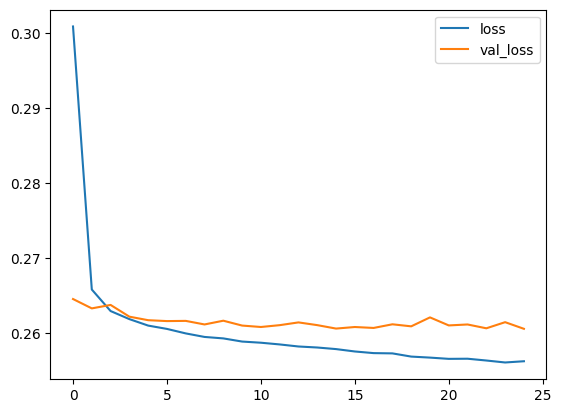

In [92]:
losses_df.plot()

## Predictions

In [93]:
predictions = (model.predict(X_test) > 0.5).astype(int)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step


In [94]:
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



<Axes: >

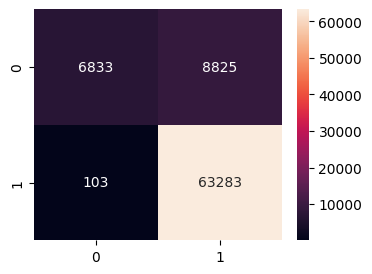

In [95]:
plt.figure(figsize=(4,3))
matrix = confusion_matrix(y_true=y_test, y_pred=predictions)
sns.heatmap(matrix, annot=True, fmt='1.0f')

## Predicting on New Data

In [96]:
random.seed(101)
random_ind = random.randint(0, len(df))

new_customer = df.drop('loan_repaid', axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.0
term                60
int_rate         18.24
installment     638.11
annual_inc     61665.0
                ...   
30723             True
48052            False
70466            False
86630            False
93700            False
Name: 305323, Length: 78, dtype: object

In [97]:
new_customer.values.reshape(1, 78)

array([[25000.0, 60, 18.24, 638.11, 61665.0, 30.11, 1996, 16.0, 0.0,
        27778.0, 65.5, 46.0, 0.0, 0.0, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, True, False, True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        True, False, False, False, True, False, False, False, False,
        True, False, False, False, False]], dtype=object)

In [98]:
new_customer = scaler.transform(new_customer.values.reshape(1, 78))

In [99]:
new_customer_prediction = (model.predict(new_customer) > 0.5).astype(int)
new_customer_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[1]])

In [100]:
df.iloc[random_ind]['loan_repaid']

1